In [1]:
//%jsroot on

In [2]:
TCanvas *c1=new TCanvas("c1","c1");

In [3]:
Double_t all3,all3r;
        Double_t x,r,aa;
        string ss;
Double_t out2[1000];
ifstream read3;
read3.open("/home/zhuhy/JNBook/Experiment2022/taf/else/twofnr/txt/pdytest.txt", ios::in);
TGraph *gf3=new TGraph();

        if(!read3.is_open()){
                cout<<" Cannot find normParas" <<endl;
                return;
        }
        Int_t line = 0,countgf3=0;
        line = 0;
        x=0.107;
        while(!read3.eof()){
                    read3>>aa>>r;
                    gf3->SetPoint(countgf3++,x,r);
                    all3+=0.107*r*r;
                    all3r+=0.107*r*r*x*x;
                    out2[line]=r;
                    line++;
                    //if(line%2==0)cout<<line<<'\t'<<x<<'\t'<<r<<'\n';
                    x=x+0.107;
        }
        read3.close();
cout<<"积分="<<all3<<'\t'<<"*r积分="<<all3r<<'\n';

积分=0.294243	*r积分=0.996006


In [4]:
Double_t out[1000];
ifstream read1;
line=0;
read1.open("/home/zhuhy/JNBook/Experiment2022/taf/else/twofnr/atxt/15Cpd_s.txt", ios::in);
TGraph *gf=new TGraph();

        if(!read1.is_open()){
                cout<<" Cannot find normParas" <<endl;
                return;
        }
        Int_t countgf=0;
        while(!read1.eof()&&line<81){
                if(line<1)getline(read1,ss);
                else {
                    read1>>x>>r>>aa;
                    gf->SetPoint(countgf++,x,r);
                    //cout<<x<<'\t'<<r<<'\n';
                }
                line++;
        }
        read1.close();


In [5]:
Double_t all2,all2r;
TGraph *gfxx=new TGraph();
TGraph *gfxxr=new TGraph();
Int_t countgfxx=0,countgfxxr=0;
for(Int_t ii=0;ii<200;ii+=1){
    out[ii]=gf->Eval(1.07*(Double_t)(ii)/10.);
    //gfxx->SetPoint(countgfxx++,(Double_t)(ii)/10.,-out[ii]);
    //cout<<(Double_t)(ii)*0.107<<'\t'<<out[ii]<<'\n';
    if(ii*0.107>20.)out[ii]=0;
}
for(Double_t ii=20;ii<30;ii+=0.1){
    gfxx->SetPoint(countgfxx++,ii,0);
    //cout<<ii<<'\t'<<gf->Eval(ii)<<'\n';
}
if(out[3]<0){
    for(Int_t ii=0;ii<200;ii+=1){
        out[ii]=-out[ii];
    }
}

Double_t ttest=2.;
for(Int_t ii=0;ii<300;ii+=1){
    //cout<<"**********"<<ii<<'\t'<<out[ii]<<'\n';
        if(fabs(out[ii]-0)<0.00000000001)out[ii]=0.0;
    //cout<<ii<<'\t'<<out[ii]<<'\n'<<'\n';
    if(ii*1.07>130.)out[ii]=out2[ii]*ttest;
    gfxx->SetPoint(countgfxx++,1.07*(Double_t)(ii)/10.,out[ii]);
    if(ii!=0)gfxxr->SetPoint(countgfxxr++,1.07*(Double_t)(ii)/10.,out[ii]/(1.07*(Double_t)(ii)/10.));
    all2+=out[ii]*out[ii]*0.107;
    out[ii]=out[ii]/(1.07*(Double_t)(ii)/10.);
    
    }
out[0]=gfxxr->Eval(0);
//all2+=out[0]*out[0]*0.107;
gfxxr->SetPoint(0,0,out[0]);
cout<<"积分="<<all2<<'\n';

积分=0.959476


In [6]:
for(Int_t ii=0;ii<300;ii+=1){
    //cout<<"**********"<<ii<<'\t'<<out[ii]<<'\n';
}

In [7]:
/*
TGraph *gfxx=new TGraph();
Int_t countgfxx=0;
for(Int_t ii=0;ii<300;ii+=1){
    out[ii]=gf->Eval((Double_t)(ii)*0.0666666667);
    //gfxx->SetPoint(countgfxx++,(Double_t)(ii)/10.,-out[ii]);
    //cout<<(Double_t)(ii)/10.<<'\t'<<out[ii]<<'\n';
}
for(Double_t ii=30;ii<30;ii+=0.1){
    gfxx->SetPoint(countgfxx++,ii,0);
    //cout<<ii<<'\t'<<gf->Eval(ii)<<'\n';
}
if(out[3]<0){
    for(Int_t ii=0;ii<300;ii+=1){
        out[ii]=-out[ii];
    }
}
for(Int_t ii=0;ii<300;ii+=1){
    //cout<<"**********"<<ii<<'\t'<<out[ii]<<'\n';
        if(fabs(out[ii]-0)<0.00000000001)out[ii]=0.0;
    //cout<<ii<<'\t'<<out[ii]<<'\n'<<'\n';
    gfxx->SetPoint(countgfxx++,(Double_t)(ii)*0.0666666667,out[ii]);
    }
*/

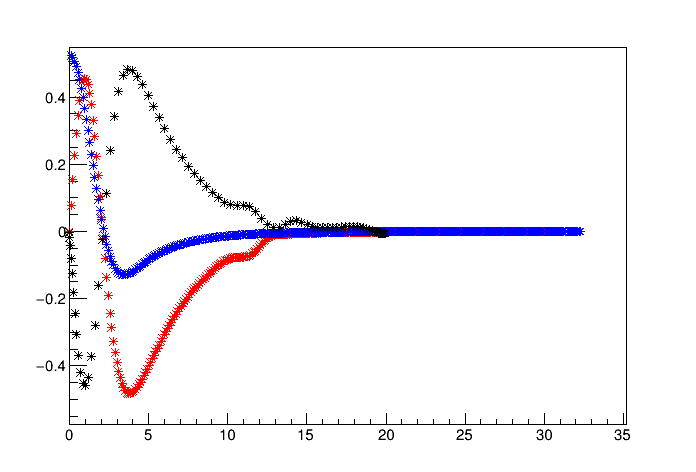

In [8]:
//gfxx->GetXaxis()->SetLimits(0, 30);
//gfxx->GetYaxis()->SetRangeUser(-0.6, -0.0001); 
c1->Clear();
gf->SetMarkerStyle(3);
gfxx->SetMarkerStyle(3);
gfxx->SetMarkerColor(2);
gf3->SetMarkerStyle(3);
gf3->SetMarkerColor(4);
gfxx->Draw("ap");
gf3->Draw("samep");
gf->Draw("samep");
c1->SetLogy(0);
c1->Draw();

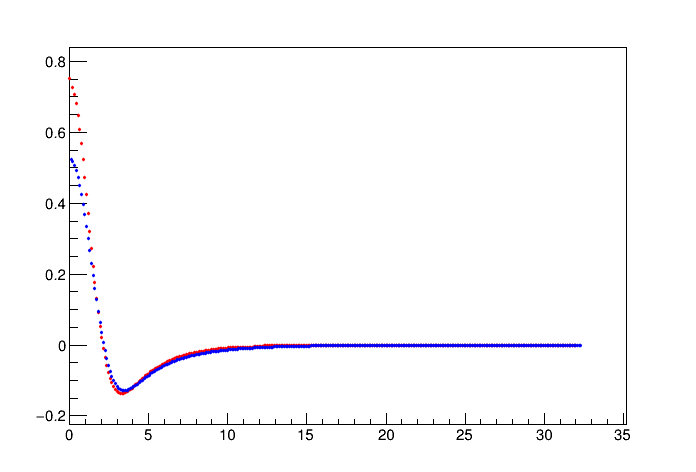

In [9]:
//gfxxr->GetXaxis()->SetLimits(0, 30);
//gfxxr->GetYaxis()->SetRangeUser(0.00000001, 0.5); 
c1->Clear();
gf3->SetMarkerStyle(8);
gfxxr->SetMarkerStyle(8);
gf3->SetMarkerSize(0.4);
gfxxr->SetMarkerSize(0.4);
gfxxr->SetMarkerColor(2);
gfxxr->Draw("ap");
//gf->Draw("samep");
gf3->Draw("samep");
c1->SetLogy(0);
c1->Draw();

In [10]:
/*
        ofstream write1;
        TString fileName = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/else/twofnr/atxt/nbrmy15Cpd_s.txt");
        write1.open(fileName.Data(), ios::out);
        for(Int_t i=0; i<300; i++){
    if(out[i]>=0)write1<<"  "<<setiosflags(ios_base::scientific)<<setprecision(7)<< out[i]  <<resetiosflags(ios_base::scientific);
    else if(out[i]<0)write1<<" "<<setiosflags(ios_base::scientific)<<setprecision(7)<< out[i]  <<resetiosflags(ios_base::scientific);
        if(i%5==4)write1<<endl;
        }
        write1.close();
*/